In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [27]:
df = pd.read_csv('Position_Salaries.csv')
print(df.shape)
#df.head(5)
df

(10, 3)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [33]:
X = df.iloc[:,1:2]          
y=df.iloc[:,2]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [34]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.45, random_state=42)

In [35]:
regr = linear_model.LinearRegression()

In [36]:
regr.fit(X_train, y_train) 

LinearRegression()

In [37]:
y_pred = regr.predict(X_test)

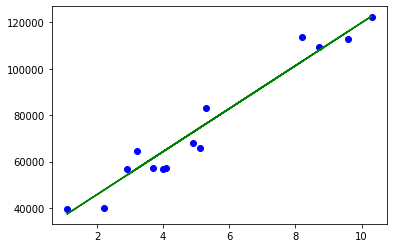

In [14]:
plt.scatter(X_test, y_test, c='blue') 
plt.plot(X_test, y_pred, color='g') 
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse=mse.astype(int)
mse

72788774666

In [39]:
print(regr.predict([[5.5]]))


[250649.35064935]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
poly_reg = PolynomialFeatures(degree=3)       
X_poly = poly_reg.fit_transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [42]:
model = LinearRegression()
model.fit(X_poly, y)      
pred2=model.predict(X_poly)
pred2

array([ 14902.0979021 ,  78759.9067599 ,  94960.37296037,  88223.77622377,
        83270.39627039, 104820.51282051, 177594.40559441, 326312.35431236,
       575694.63869464, 950461.53846154])

Text(0, 0.5, 'Salary')

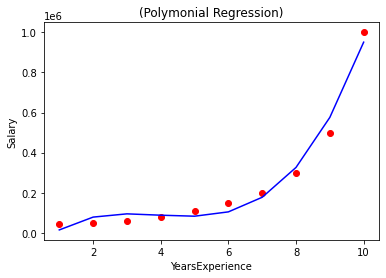

In [43]:
plt.scatter(X, y, color='red')
plt.plot(X, pred2, color='blue')
plt.title('(Polymonial Regression)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')